## Setup

In [1]:
import pandas as pd
import unidecode
from typing import Optional
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
DATA_DIR = '../data/'

In [3]:
def most_common_ignore_na(series: pd.Series) -> Optional[str]:
    """
    Returns the most common value in a series, ignoring null values.
    If all values are null, returns None.

    Args:
        series (pd.Series): A pandas Series containing values for a specific attribute.

    Returns:
        Optional[str]: The most common value in the series, or None if all values are null.
    """
    mode = series.dropna().mode()  # Calculate the mode, ignoring nulls
    if not mode.empty:
        return mode[0]  # Return the most common value if it exists
    else:
        return None  # Return None if all values are null

In [4]:
# standadize string function
standardize_string = lambda x: unidecode.unidecode(x.lower())

## Read Data

In [5]:
def read_dataset(
    data_dir,
    scope,
    dataset
):
    
    data_path = f'{data_dir}processed/{scope}/{dataset}.csv'
    df = pd.read_csv(data_path)
    return df

In [6]:
scope = 'restritivo'
scope = 'aplicacoes'

df_book_raw = read_dataset(data_dir=DATA_DIR, scope=scope, dataset='livros')
df_user = read_dataset(data_dir=DATA_DIR, scope=scope, dataset='gerais')
df_per = read_dataset(data_dir=DATA_DIR, scope=scope, dataset='periodicos')
df_cap = read_dataset(data_dir=DATA_DIR, scope=scope, dataset='capitulos')
df_eventos = read_dataset(data_dir=DATA_DIR, scope=scope, dataset='eventos')

/tmp/ipykernel_928351/2665445384.py:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


## Describe Data

In [7]:
# length of datasets
print(f'Shape "gerais": {df_user.shape}')
print(f'Shape "livros": {df_book_raw.shape}')
print(f'Shape "periodicos": {df_per.shape}')
print(f'Shape "capitulos": {df_cap.shape}')
print(f'Shape "eventos": {df_eventos.shape}')

Shape "gerais": (3992, 9)
Shape "livros": (8119, 26)
Shape "periodicos": (169425, 19)
Shape "capitulos": (27645, 26)
Shape "eventos": (328035, 19)


In [8]:
# columsn of datasets
print(f'Columns "gerais": {list(df_user.columns)}')
print(f'Columns "livros": {list(df_book_raw.columns)}')
print(f'Columns "periodicos": {list(df_per.columns)}')
print(f'Columns "capitulos": {list(df_cap.columns)}')
print(f'Columns "eventos": {list(df_eventos.columns)}')

Columns "gerais": ['LattesID', 'NOME-COMPLETO', 'DATA-ATUALIZACAO', 'HORA-ATUALIZACAO', 'CIDADE-NASCIMENTO', 'UF-NASCIMENTO', 'PAIS-DE-NASCIMENTO', 'NACIONALIDADE', 'DATA-DE-FALECIMENTO']
Columns "livros": ['LattesID', 'ANO', 'TITULO-DO-LIVRO', 'NATUREZA', 'IDIOMA', 'TIPO', 'NOME-DA-EDITORA', 'CIDADE-DA-EDITORA', 'PAIS-DE-PUBLICACAO', 'ISBN', 'NUMERO-DE-PAGINAS', 'PAIS-DE-PUBLICACAO2', 'NOME-PARA-CITACAO', 'NOME-COMPLETO-DO-AUTOR', 'NOME-GRANDE-AREA-DO-CONHECIMENTO', 'NOME-DA-AREA-DO-CONHECIMENTO', 'NOME-DA-SUB-AREA-DO-CONHECIMENTO', 'NOME-DA-ESPECIALIDADE', 'NOME-GRANDE-AREA-DO-CONHECIMENTO2', 'NOME-DA-AREA-DO-CONHECIMENTO2', 'NOME-DA-SUB-AREA-DO-CONHECIMENTO2', 'NOME-DA-ESPECIALIDADE2', 'NOME-GRANDE-AREA-DO-CONHECIMENTO3', 'NOME-DA-AREA-DO-CONHECIMENTO3', 'NOME-DA-SUB-AREA-DO-CONHECIMENTO3', 'NOME-DA-ESPECIALIDADE3']
Columns "periodicos": ['LattesID', 'ANO-DO-ARTIGO', 'TITULO-DO-ARTIGO', 'NATUREZA', 'IDIOMA', 'ISSN', 'TITULO-DO-PERIODICO-OU-REVISTA', 'PAGINA-INICIAL', 'PAGINA-FINAL',

### GERAIS

In [9]:
df_user.head()

,LattesID,NOME-COMPLETO,DATA-ATUALIZACAO,HORA-ATUALIZACAO,CIDADE-NASCIMENTO,UF-NASCIMENTO,PAIS-DE-NASCIMENTO,NACIONALIDADE,DATA-DE-FALECIMENTO
0,565598534943,Sdnei de Brito Alves,25012007,120204,Itajubá,BA,Brasil,B,NaN
1,601083852823,Alexandre Loureiros Rodrigues,12072021,204404,Vitória,ES,Brasil,B,NaN
2,5349558315095,Juliano Manabu Iyoda,24092021,105006,Recife,PE,Brasil,B,NaN
3,10858860721392,Hugo Bastos de Paula,2032021,83521,Belo Horizonte,MG,Brasil,B,NaN
4,11303079806761,Gerald Jean Francis Banon,3062014,113408,Paris,NaN,França,B,NaN


### LIVROS

In [10]:
df_book_raw.head()

,LattesID,ANO,TITULO-DO-LIVRO,NATUREZA,IDIOMA,TIPO,NOME-DA-EDITORA,CIDADE-DA-EDITORA,PAIS-DE-PUBLICACAO,ISBN,...,NOME-DA-SUB-AREA-DO-CONHECIMENTO,NOME-DA-ESPECIALIDADE,NOME-GRANDE-AREA-DO-CONHECIMENTO2,NOME-DA-AREA-DO-CONHECIMENTO2,NOME-DA-SUB-AREA-DO-CONHECIMENTO2,NOME-DA-ESPECIALIDADE2,NOME-GRANDE-AREA-DO-CONHECIMENTO3,NOME-DA-AREA-DO-CONHECIMENTO3,NOME-DA-SUB-AREA-DO-CONHECIMENTO3,NOME-DA-ESPECIALIDADE3
0,'0011303079806761,2000,Formal introduction to digital image processing,TEXTO_INTEGRAL,Inglês,LIVRO_PUBLICADO,Instituto Nacional de Pesquisas Espaciais,São José dos Campos,Brasil,NaN,...,Metodologia e Técnicas da Computação,Processamento Digital de Imagens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,'0011303079806761,1997,Mathematical Morphology Application Examples,NAO_INFORMADO,Inglês,LIVRO_PUBLICADO,Depositado na URLib/Web; repositorio: &lt;dpi....,"São José dos Campos, SP",Brasil,NaN,...,Metodologia e Técnicas da Computação,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,'0011303079806761,1998,Formal Introduction To Digital Image Processing,TEXTO_INTEGRAL,Inglês,LIVRO_PUBLICADO,Instituto Nacional de Pesquisas Espaciais,"Sao Jose dos Campos, SP",Brasil,NaN,...,Metodologia e Técnicas da Computação,Processamento Digital de Imagens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,'0011303079806761,1998,Bases da Morfologia Matemática Para A Análise ...,NAO_INFORMADO,Português,LIVRO_PUBLICADO,"Depositado na URLib/Web, repositorio = &lt;dpi...","Sao Jose dos Campos, SP",Brasil,NaN,...,Metodologia e Técnicas da Computação,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,'0011303079806761,1997,Brazilian Workshop'97 On Mathematical Morpholo...,NAO_INFORMADO,Inglês,LIVRO_PUBLICADO,DEPOSITADO NA URLIB/WEB; REPOSITORIO: &lt;dpi....,SAO JOSE DOS CAMPOS,Brasil,NaN,...,Matemática Aplicada,NaN,CIENCIAS_EXATAS_E_DA_TERRA,Ciência da Computação,Metodologia e Técnicas da Computação,NaN,NaN,NaN,NaN,NaN


In [11]:
print('### Book name Describe ###')
print(f'Number of rows: {len(df_book_raw['TITULO-DO-LIVRO'])}')
print(f'Number of rows (dropna): {len(df_book_raw['TITULO-DO-LIVRO'].dropna())}')
print(f'Number of unique books names: {len(df_book_raw['TITULO-DO-LIVRO'].unique())}')
print(f'Number of unique books names (lower): {len(df_book_raw['TITULO-DO-LIVRO'].str.lower().unique())}')
print(f'Number of unique books names (standardize): {len(df_book_raw['TITULO-DO-LIVRO'].apply(standardize_string).unique())}')

print('\n### ISBN Describe ###')
print(f'Number of rows: {len(df_book_raw['ISBN'])}')
print(f'Number of rows (dropna): {len(df_book_raw['ISBN'].dropna())}')
print(f'Number of unique books ISBN: {len(df_book_raw['ISBN'].dropna().unique())}')
print(f'Number of unique books ISBN (lower): {len(df_book_raw['ISBN'].dropna().str.lower().unique())}')
print(f'Number of unique books ISBN (standardize): {len(df_book_raw['ISBN'].dropna().apply(standardize_string).unique())}')

### Book name Describe ###
Number of rows: 8119
Number of rows (dropna): 8119
Number of unique books names: 7637
Number of unique books names (lower): 7501
Number of unique books names (standardize): 7471

### ISBN Describe ###
Number of rows: 8119
Number of rows (dropna): 6775
Number of unique books ISBN: 6065
Number of unique books ISBN (lower): 6065
Number of unique books ISBN (standardize): 6065


### PERIODICOS

In [12]:
df_per.head()

,LattesID,ANO-DO-ARTIGO,TITULO-DO-ARTIGO,NATUREZA,IDIOMA,ISSN,TITULO-DO-PERIODICO-OU-REVISTA,PAGINA-INICIAL,PAGINA-FINAL,VOLUME,FASCICULO,SERIE,LOCAL-DE-PUBLICACAO,PAIS-DE-PUBLICACAO,DOI,NOME-GRANDE-AREA-DO-CONHECIMENTO,NOME-DA-AREA-DO-CONHECIMENTO,NOME-DA-SUB-AREA-DO-CONHECIMENTO,NOME-DA-ESPECIALIDADE
0,11303079806761,2002,Fuzzy expert systems architecture for image cl...,COMPLETO,Inglês,NaN,Information Sciences,7,21,142,1-4,NaN,NaN,Holanda,NaN,NaN,NaN,NaN,NaN
1,11303079806761,1998,MMACH: A mathematical morphology toolbox for t...,COMPLETO,Inglês,NaN,JOURNAL OF ELECTRONIC IMAGING,174,210,7,1,NaN,NaN,Estados Unidos,NaN,CIENCIAS_EXATAS_E_DA_TERRA,Ciência da Computação,Metodologia e Técnicas da Computação,NaN
2,11303079806761,1971,Identification Stochastique Des Processus En T...,COMPLETO,Francês,NaN,"CHIMIE ET INDUSTRIE, GENIE CHIMIQUE",441,448,104,4,NaN,NaN,França,NaN,CIENCIAS_EXATAS_E_DA_TERRA,Probabilidade e Estatística,Probabilidade e Estatística Aplicadas,NaN
3,11303079806761,1972,Estimation Lineaire Recurrente de Parametres d...,COMPLETO,Francês,NaN,REVUE DU CETHEDEC,39,86,32,NaN,NaN,NaN,Brasil,NaN,ENGENHARIAS,Engenharia Elétrica,"Eletrônica Industrial, Sistemas e Controles El...",NaN
4,11303079806761,1976,Sur un estimateur non paramétrique de la densi...,COMPLETO,Francês,NaN,REVUE DE STATISTIQUE APPLIQUEE,61,73,24,4,NaN,NaN,França,NaN,CIENCIAS_EXATAS_E_DA_TERRA,Probabilidade e Estatística,Probabilidade e Estatística Aplicadas,NaN


In [13]:
df_per[['TITULO-DO-ARTIGO', 'TITULO-DO-PERIODICO-OU-REVISTA']] = df_per[['TITULO-DO-ARTIGO', 'TITULO-DO-PERIODICO-OU-REVISTA']].astype('str')

In [14]:
print('### Paper name Describe ###')
print(f'Number of rows: {len(df_per['TITULO-DO-ARTIGO'])}')
print(f'Number of rows (dropna): {len(df_per['TITULO-DO-ARTIGO'].dropna())}')
print(f'Number of unique paper names: {len(df_per['TITULO-DO-ARTIGO'].unique())}')
print(f'Number of unique paper names (lower): {len(df_per['TITULO-DO-ARTIGO'].str.lower().unique())}')
print(f'Number of unique paper names (standardize): {len(df_per['TITULO-DO-ARTIGO'].apply(standardize_string).unique())}')

print('\n### Paper name Describe ###')
print(f'Number of rows: {len(df_per['TITULO-DO-ARTIGO'])}')
print(f'Number of rows (dropna): {len(df_per[['TITULO-DO-ARTIGO', 'TITULO-DO-PERIODICO-OU-REVISTA']].dropna())}')
print(f'Number of unique paper + journal names: {len(df_per[['TITULO-DO-ARTIGO', 'TITULO-DO-PERIODICO-OU-REVISTA']].drop_duplicates())}')
print(f'Number of unique paper + journal names (lower): {len(df_per[['TITULO-DO-ARTIGO', 'TITULO-DO-PERIODICO-OU-REVISTA']].drop_duplicates().apply(lambda x: (x['TITULO-DO-ARTIGO'].lower(), x['TITULO-DO-PERIODICO-OU-REVISTA'].lower()), axis =1, result_type='expand'))}')
print(f'Number of unique paper + journal names (standardize): {len(df_per[['TITULO-DO-ARTIGO', 'TITULO-DO-PERIODICO-OU-REVISTA']].drop_duplicates().apply(lambda x: (standardize_string(x['TITULO-DO-ARTIGO']), standardize_string(x['TITULO-DO-PERIODICO-OU-REVISTA'])), axis =1, result_type='expand'))}')


print('\n### DOI Describe ###')
print(f'Number of rows: {len(df_per['DOI'])}')
print(f'Number of rows (dropna): {len(df_per['DOI'].dropna())}')
print(f'Number of unique paper DOI: {len(df_per['DOI'].dropna().unique())}')
print(f'Number of unique paper DOI (lower): {len(df_per['DOI'].dropna().str.lower().unique())}')
print(f'Number of unique paper DOI (standardize): {len(df_per['DOI'].dropna().apply(standardize_string).unique())}')

### Paper name Describe ###
Number of rows: 169425
Number of rows (dropna): 169425
Number of unique paper names: 150047
Number of unique paper names (lower): 147375
Number of unique paper names (standardize): 147101

### Paper name Describe ###
Number of rows: 169425
Number of rows (dropna): 169425
Number of unique paper + journal names: 153573
Number of unique paper + journal names (lower): 153573
Number of unique paper + journal names (standardize): 153573

### DOI Describe ###
Number of rows: 169425
Number of rows (dropna): 91310
Number of unique paper DOI: 76818
Number of unique paper DOI (lower): 75653
Number of unique paper DOI (standardize): 75653


### CAPITULOS

In [15]:
df_cap.head()

,LATTES_ID,ANO,TITULO-DO-CAPITULO-DO-LIVRO,TITULO-DO-LIVRO,IDIOMA,TIPO,NOME-DA-EDITORA,CIDADE-DA-EDITORA,PAIS-DE-PUBLICACAO,ISBN,...,NOME-DA-SUB-AREA-DO-CONHECIMENTO,NOME-DA-ESPECIALIDADE,NOME-GRANDE-AREA-DO-CONHECIMENTO2,NOME-DA-AREA-DO-CONHECIMENTO2,NOME-DA-SUB-AREA-DO-CONHECIMENTO2,NOME-DA-ESPECIALIDADE2,NOME-GRANDE-AREA-DO-CONHECIMENTO3,NOME-DA-AREA-DO-CONHECIMENTO3,NOME-DA-SUB-AREA-DO-CONHECIMENTO3,NOME-DA-ESPECIALIDADE3
0,'0011303079806761,1994,A mathematical morphology toolbox for the KHOR...,Image Algebra and Morphological Image Processi...,Inglês,Capítulo de livro publicado,SPIE,NaN,Estados Unidos,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,'0011303079806761,1995,Characterization of translation-invariant elem...,"Neural, Morphological, and Stochastic Methods ...",Inglês,Capítulo de livro publicado,SPIE,Belling-ham,Estados Unidos,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,'0011303079806761,1992,Expressiveness of the morfological language,Image Algebra and Morphological Image Processi...,Inglês,Capítulo de livro publicado,SPIE,NaN,Estados Unidos,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,'0011303079806761,1998,Animomat Project: Image Analysis Using Mathema...,WORKSHOP OF INTERNATIONAL EVALUATION OF THE PR...,Inglês,Capítulo de livro publicado,CNPQ,"BRASILIA, DF",Brasil,NaN,...,Metodologia e Técnicas da Computação,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,'0011303079806761,1994,Set Operator Decomposition And Conditionally T...,MATHEMATICAL MORPHOLOGY AND ITS APPLICATIONS T...,Inglês,Capítulo de livro publicado,KLUWER,NaN,Holanda,NaN,...,Metodologia e Técnicas da Computação,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_cap['TITULO-DO-LIVRO'] = df_cap['TITULO-DO-LIVRO'].astype('str')

In [17]:
print('### Book name Describe ###')
print(f'Number of rows: {len(df_cap['TITULO-DO-LIVRO'])}')
print(f'Number of rows (dropna): {len(df_cap['TITULO-DO-LIVRO'].dropna())}')
print(f'Number of unique books names: {len(df_cap['TITULO-DO-LIVRO'].unique())}')
print(f'Number of unique books names (lower): {len(df_cap['TITULO-DO-LIVRO'].str.lower().unique())}')
print(f'Number of unique books names (standardize): {len(df_cap['TITULO-DO-LIVRO'].apply(standardize_string).unique())}')

print('\n### ISBN Describe ###')
print(f'Number of rows: {len(df_cap['ISBN'])}')
print(f'Number of rows (dropna): {len(df_cap['ISBN'].dropna())}')
print(f'Number of unique books ISBN: {len(df_cap['ISBN'].dropna().unique())}')
print(f'Number of unique books ISBN (lower): {len(df_cap['ISBN'].dropna().str.lower().unique())}')
print(f'Number of unique books ISBN (standardize): {len(df_cap['ISBN'].dropna().apply(standardize_string).unique())}')

### Book name Describe ###
Number of rows: 27645
Number of rows (dropna): 27645
Number of unique books names: 16442
Number of unique books names (lower): 15497
Number of unique books names (standardize): 15344

### ISBN Describe ###
Number of rows: 27645
Number of rows (dropna): 23819
Number of unique books ISBN: 12679
Number of unique books ISBN (lower): 12672
Number of unique books ISBN (standardize): 12672


### EVENTOS

In [18]:
df_eventos.head()

,LattesID,ANO-DO-TRABALHO,TITULO-DO-TRABALHO,NATUREZA,IDIOMA,TITULO-DOS-ANAIS-OU-PROCEEDINGS,PAGINA-INICIAL,PAGINA-FINAL,CLASSIFICACAO-DO-EVENTO,NOME-DO-EVENTO,CIDADE-DO-EVENTO,ANO-DE-REALIZACAO,PAIS-DO-EVENTO,ISBN,DOI,NOME-GRANDE-AREA-DO-CONHECIMENTO,NOME-DA-AREA-DO-CONHECIMENTO,NOME-DA-SUB-AREA-DO-CONHECIMENTO,NOME-DA-ESPECIALIDADE
0,11303079806761,2017.0,Algumas relações entre a teoria e práticas nas...,COMPLETO,Português,Anais do XVI SPGCS,2529,2543,NACIONAL,XVI Semana de Pós-Graduação em Ciências Sociai...,Araraquara-SP,2017.0,Brasil,978-85-8359-0,NaN,NaN,NaN,NaN,NaN
1,11303079806761,1995.0,Constructive decomposition of fuzzy measures i...,COMPLETO,Inglês,Proceedings,217,220,INTERNACIONAL,Sixth Iinternational Fuzzy Systems Association...,"São Paulo, SP",1995.0,Brasil,NaN,NaN,CIENCIAS_EXATAS_E_DA_TERRA,Probabilidade e Estatística,Probabilidade,NaN
2,11303079806761,1995.0,A mathematical morphology toolbox for the KHOR...,COMPLETO,Inglês,Anais,0,0,LOCAL,Brazilian Workshop'95 on Mathematical Morphology,Campinas,1995.0,Brasil,NaN,NaN,CIENCIAS_EXATAS_E_DA_TERRA,Ciência da Computação,Metodologia e Técnicas da Computação,NaN
3,11303079806761,1994.0,Automatic Programming Of Binary Morphological ...,COMPLETO,Inglês,NaN,0,0,NAO_INFORMADO,INERNATIONAL SYMPOSIUM ON OPTICAL APPLIED SCIE...,NaN,NaN,Estados Unidos,NaN,NaN,CIENCIAS_EXATAS_E_DA_TERRA,Ciência da Computação,Metodologia e Técnicas da Computação,NaN
4,11303079806761,1993.0,A decomposition theorem in Mathematical Morpho...,COMPLETO,Inglês,Proceedings,234,238,INTERNACIONAL,Technical Workshop on Mathematical Morphology ...,Barcelona,1993.0,Espanha,NaN,NaN,CIENCIAS_EXATAS_E_DA_TERRA,Ciência da Computação,Metodologia e Técnicas da Computação,NaN


In [19]:
print('### Event name Describe ###')
print(f'Number of rows: {len(df_eventos['TITULO-DO-TRABALHO'])}')
print(f'Number of rows (dropna): {len(df_eventos['TITULO-DO-TRABALHO'].dropna())}')
print(f'Number of unique work names: {len(df_eventos['TITULO-DO-TRABALHO'].unique())}')
print(f'Number of unique work names (lower): {len(df_eventos['TITULO-DO-TRABALHO'].str.lower().unique())}')
print(f'Number of unique work names (standardize): {len(df_eventos['TITULO-DO-TRABALHO'].apply(standardize_string).unique())}')

print('\n### ISBN Describe ###')
print(f'Number of rows: {len(df_eventos['ISBN'])}')
print(f'Number of rows (dropna): {len(df_eventos['ISBN'].dropna())}')
print(f'Number of unique event work ISBN: {len(df_eventos['ISBN'].dropna().unique())}')
print(f'Number of unique event work ISBN (lower): {len(df_eventos['ISBN'].dropna().str.lower().unique())}')
print(f'Number of unique event work ISBN (standardize): {len(df_eventos['ISBN'].dropna().apply(standardize_string).unique())}')

print('\n### DOI Describe ###')
print(f'Number of rows: {len(df_eventos['DOI'])}')
print(f'Number of rows (dropna): {len(df_eventos['DOI'].dropna())}')
print(f'Number of unique event work DOI: {len(df_eventos['DOI'].dropna().unique())}')
print(f'Number of unique event work DOI (lower): {len(df_eventos['DOI'].dropna().str.lower().unique())}')
print(f'Number of unique event work DOI (standardize): {len(df_eventos['DOI'].dropna().apply(standardize_string).unique())}')

### Event name Describe ###
Number of rows: 328035
Number of rows (dropna): 328035
Number of unique work names: 303404
Number of unique work names (lower): 294896
Number of unique work names (standardize): 293865

### ISBN Describe ###
Number of rows: 328035
Number of rows (dropna): 69095
Number of unique event work ISBN: 19207
Number of unique event work ISBN (lower): 19161
Number of unique event work ISBN (standardize): 19161

### DOI Describe ###
Number of rows: 328035
Number of rows (dropna): 24911
Number of unique event work DOI: 21833
Number of unique event work DOI (lower): 20657
Number of unique event work DOI (standardize): 20657


## Prepare Data

### LIVROS

In [20]:
# create column with standardize book name
df_book_raw['STANDARDIZE-TITULO-DO-LIVRO'] = df_book_raw['TITULO-DO-LIVRO'].apply(standardize_string)
df_book_raw.head()

,LattesID,ANO,TITULO-DO-LIVRO,NATUREZA,IDIOMA,TIPO,NOME-DA-EDITORA,CIDADE-DA-EDITORA,PAIS-DE-PUBLICACAO,ISBN,...,NOME-DA-ESPECIALIDADE,NOME-GRANDE-AREA-DO-CONHECIMENTO2,NOME-DA-AREA-DO-CONHECIMENTO2,NOME-DA-SUB-AREA-DO-CONHECIMENTO2,NOME-DA-ESPECIALIDADE2,NOME-GRANDE-AREA-DO-CONHECIMENTO3,NOME-DA-AREA-DO-CONHECIMENTO3,NOME-DA-SUB-AREA-DO-CONHECIMENTO3,NOME-DA-ESPECIALIDADE3,STANDARDIZE-TITULO-DO-LIVRO
0,'0011303079806761,2000,Formal introduction to digital image processing,TEXTO_INTEGRAL,Inglês,LIVRO_PUBLICADO,Instituto Nacional de Pesquisas Espaciais,São José dos Campos,Brasil,NaN,...,Processamento Digital de Imagens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,formal introduction to digital image processing
1,'0011303079806761,1997,Mathematical Morphology Application Examples,NAO_INFORMADO,Inglês,LIVRO_PUBLICADO,Depositado na URLib/Web; repositorio: &lt;dpi....,"São José dos Campos, SP",Brasil,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mathematical morphology application examples
2,'0011303079806761,1998,Formal Introduction To Digital Image Processing,TEXTO_INTEGRAL,Inglês,LIVRO_PUBLICADO,Instituto Nacional de Pesquisas Espaciais,"Sao Jose dos Campos, SP",Brasil,NaN,...,Processamento Digital de Imagens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,formal introduction to digital image processing
3,'0011303079806761,1998,Bases da Morfologia Matemática Para A Análise ...,NAO_INFORMADO,Português,LIVRO_PUBLICADO,"Depositado na URLib/Web, repositorio = &lt;dpi...","Sao Jose dos Campos, SP",Brasil,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bases da morfologia matematica para a analise ...
4,'0011303079806761,1997,Brazilian Workshop'97 On Mathematical Morpholo...,NAO_INFORMADO,Inglês,LIVRO_PUBLICADO,DEPOSITADO NA URLIB/WEB; REPOSITORIO: &lt;dpi....,SAO JOSE DOS CAMPOS,Brasil,NaN,...,NaN,CIENCIAS_EXATAS_E_DA_TERRA,Ciência da Computação,Metodologia e Técnicas da Computação,NaN,NaN,NaN,NaN,NaN,brazilian workshop'97 on mathematical morpholo...


In [21]:
# remove ' first char and transform to int
df_book_raw.LattesID = df_book_raw.LattesID.apply(lambda x: x.replace("'",'')).astype('int')

In [22]:
# create df with id -> standardize_book_name
df_book_id = pd.DataFrame({'STANDARDIZE-TITULO-DO-LIVRO': df_book_raw['STANDARDIZE-TITULO-DO-LIVRO'].unique()})\
    .reset_index(drop=False)\
        .rename({'index': 'book_id'}, axis=1)
        
df_book_id.head()

,book_id,STANDARDIZE-TITULO-DO-LIVRO
0,0,formal introduction to digital image processing
1,1,mathematical morphology application examples
2,2,bases da morfologia matematica para a analise ...
3,3,brazilian workshop'97 on mathematical morpholo...
4,4,bases da computacao grafica


In [23]:
df_book_raw = df_book_raw.merge(
    df_book_id,
    on = 'STANDARDIZE-TITULO-DO-LIVRO'
)
df_book_raw.head()

,LattesID,ANO,TITULO-DO-LIVRO,NATUREZA,IDIOMA,TIPO,NOME-DA-EDITORA,CIDADE-DA-EDITORA,PAIS-DE-PUBLICACAO,ISBN,...,NOME-GRANDE-AREA-DO-CONHECIMENTO2,NOME-DA-AREA-DO-CONHECIMENTO2,NOME-DA-SUB-AREA-DO-CONHECIMENTO2,NOME-DA-ESPECIALIDADE2,NOME-GRANDE-AREA-DO-CONHECIMENTO3,NOME-DA-AREA-DO-CONHECIMENTO3,NOME-DA-SUB-AREA-DO-CONHECIMENTO3,NOME-DA-ESPECIALIDADE3,STANDARDIZE-TITULO-DO-LIVRO,book_id
0,11303079806761,2000,Formal introduction to digital image processing,TEXTO_INTEGRAL,Inglês,LIVRO_PUBLICADO,Instituto Nacional de Pesquisas Espaciais,São José dos Campos,Brasil,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,formal introduction to digital image processing,0
1,11303079806761,1997,Mathematical Morphology Application Examples,NAO_INFORMADO,Inglês,LIVRO_PUBLICADO,Depositado na URLib/Web; repositorio: &lt;dpi....,"São José dos Campos, SP",Brasil,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mathematical morphology application examples,1
2,11303079806761,1998,Formal Introduction To Digital Image Processing,TEXTO_INTEGRAL,Inglês,LIVRO_PUBLICADO,Instituto Nacional de Pesquisas Espaciais,"Sao Jose dos Campos, SP",Brasil,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,formal introduction to digital image processing,0
3,11303079806761,1998,Bases da Morfologia Matemática Para A Análise ...,NAO_INFORMADO,Português,LIVRO_PUBLICADO,"Depositado na URLib/Web, repositorio = &lt;dpi...","Sao Jose dos Campos, SP",Brasil,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bases da morfologia matematica para a analise ...,2
4,11303079806761,1997,Brazilian Workshop'97 On Mathematical Morpholo...,NAO_INFORMADO,Inglês,LIVRO_PUBLICADO,DEPOSITADO NA URLIB/WEB; REPOSITORIO: &lt;dpi....,SAO JOSE DOS CAMPOS,Brasil,NaN,...,CIENCIAS_EXATAS_E_DA_TERRA,Ciência da Computação,Metodologia e Técnicas da Computação,NaN,NaN,NaN,NaN,NaN,brazilian workshop'97 on mathematical morpholo...,3


In [24]:
# create df with user and the book written
df_user_book = df_book_raw[['LattesID', 'book_id']]

In [25]:
# list with all book atributes
BOOK_ATR = [
    "NATUREZA",
    "IDIOMA",
    "TIPO",
    "NOME-DA-EDITORA",
    "CIDADE-DA-EDITORA",
    "PAIS-DE-PUBLICACAO",
    "ISBN",
    "NOME-GRANDE-AREA-DO-CONHECIMENTO2",
    "NOME-DA-AREA-DO-CONHECIMENTO2",
    "NOME-DA-SUB-AREA-DO-CONHECIMENTO2",
    "NOME-DA-ESPECIALIDADE2",
    "NOME-GRANDE-AREA-DO-CONHECIMENTO3",
    "NOME-DA-AREA-DO-CONHECIMENTO3",
    "NOME-DA-SUB-AREA-DO-CONHECIMENTO3",
    "NOME-DA-ESPECIALIDADE3",
    'STANDARDIZE-TITULO-DO-LIVRO'
]


In [26]:
# create df with book_id, standardize name and the most common atributes
df_book = df_book_raw[BOOK_ATR + ['book_id']].groupby('book_id').agg(lambda x: most_common_ignore_na(x))
df_book.reset_index(drop=False, inplace = True) 

In [27]:
df_book.head()

,book_id,NATUREZA,IDIOMA,TIPO,NOME-DA-EDITORA,CIDADE-DA-EDITORA,PAIS-DE-PUBLICACAO,ISBN,NOME-GRANDE-AREA-DO-CONHECIMENTO2,NOME-DA-AREA-DO-CONHECIMENTO2,NOME-DA-SUB-AREA-DO-CONHECIMENTO2,NOME-DA-ESPECIALIDADE2,NOME-GRANDE-AREA-DO-CONHECIMENTO3,NOME-DA-AREA-DO-CONHECIMENTO3,NOME-DA-SUB-AREA-DO-CONHECIMENTO3,NOME-DA-ESPECIALIDADE3,STANDARDIZE-TITULO-DO-LIVRO
0,0,TEXTO_INTEGRAL,Inglês,LIVRO_PUBLICADO,Instituto Nacional de Pesquisas Espaciais,"Sao Jose dos Campos, SP",Brasil,None,None,None,None,None,None,None,None,None,formal introduction to digital image processing
1,1,NAO_INFORMADO,Inglês,LIVRO_PUBLICADO,Depositado na URLib/Web; repositorio: &lt;dpi....,"São José dos Campos, SP",Brasil,None,None,None,None,None,None,None,None,None,mathematical morphology application examples
2,2,NAO_INFORMADO,Português,LIVRO_PUBLICADO,"Depositado na URLib/Web, repositorio = &lt;dpi...",RECIFE,Brasil,None,None,None,None,None,None,None,None,None,bases da morfologia matematica para a analise ...
3,3,NAO_INFORMADO,Inglês,LIVRO_PUBLICADO,DEPOSITADO NA URLIB/WEB; REPOSITORIO: &lt;dpi....,SAO JOSE DOS CAMPOS,Brasil,None,CIENCIAS_EXATAS_E_DA_TERRA,Ciência da Computação,Metodologia e Técnicas da Computação,None,None,None,None,None,brazilian workshop'97 on mathematical morpholo...
4,4,NAO_INFORMADO,Português,LIVRO_PUBLICADO,CAMPUS,RIO DE JANEIRO,Brasil,None,None,None,None,None,None,None,None,None,bases da computacao grafica


In [28]:
df_user_book.head()

,LattesID,book_id
0,11303079806761,0
1,11303079806761,1
2,11303079806761,0
3,11303079806761,2
4,11303079806761,3


### PERIODICOS

In [29]:
# create column with standardize names
df_per['TITULO-DO-ARTIGO'] = df_per['TITULO-DO-ARTIGO'].apply(standardize_string)
df_per['TITULO-DO-PERIODICO-OU-REVISTA'] = df_per['TITULO-DO-PERIODICO-OU-REVISTA'].apply(standardize_string)

In [30]:
# create df with id -> (TITULO-DO-ARTIGO, TITULO-DO-PERIODICO-OU-REVISTA)
df_per_id = df_per[['TITULO-DO-ARTIGO','TITULO-DO-PERIODICO-OU-REVISTA']].drop_duplicates()\
    .reset_index(drop=False)\
        .rename({'index':'paper_id'}, axis=1)
        
df_per_id.head()

,paper_id,TITULO-DO-ARTIGO,TITULO-DO-PERIODICO-OU-REVISTA
0,0,fuzzy expert systems architecture for image cl...,information sciences
1,1,mmach: a mathematical morphology toolbox for t...,journal of electronic imaging
2,2,identification stochastique des processus en t...,"chimie et industrie, genie chimique"
3,3,estimation lineaire recurrente de parametres d...,revue du cethedec
4,4,sur un estimateur non parametrique de la densi...,revue de statistique appliquee


In [31]:
df_per = df_per.merge(
    df_per_id,
    on = ['TITULO-DO-ARTIGO','TITULO-DO-PERIODICO-OU-REVISTA']
)
df_per.head()

,LattesID,ANO-DO-ARTIGO,TITULO-DO-ARTIGO,NATUREZA,IDIOMA,ISSN,TITULO-DO-PERIODICO-OU-REVISTA,PAGINA-INICIAL,PAGINA-FINAL,VOLUME,FASCICULO,SERIE,LOCAL-DE-PUBLICACAO,PAIS-DE-PUBLICACAO,DOI,NOME-GRANDE-AREA-DO-CONHECIMENTO,NOME-DA-AREA-DO-CONHECIMENTO,NOME-DA-SUB-AREA-DO-CONHECIMENTO,NOME-DA-ESPECIALIDADE,paper_id
0,11303079806761,2002,fuzzy expert systems architecture for image cl...,COMPLETO,Inglês,NaN,information sciences,7,21,142,1-4,NaN,NaN,Holanda,NaN,NaN,NaN,NaN,NaN,0
1,11303079806761,1998,mmach: a mathematical morphology toolbox for t...,COMPLETO,Inglês,NaN,journal of electronic imaging,174,210,7,1,NaN,NaN,Estados Unidos,NaN,CIENCIAS_EXATAS_E_DA_TERRA,Ciência da Computação,Metodologia e Técnicas da Computação,NaN,1
2,11303079806761,1971,identification stochastique des processus en t...,COMPLETO,Francês,NaN,"chimie et industrie, genie chimique",441,448,104,4,NaN,NaN,França,NaN,CIENCIAS_EXATAS_E_DA_TERRA,Probabilidade e Estatística,Probabilidade e Estatística Aplicadas,NaN,2
3,11303079806761,1972,estimation lineaire recurrente de parametres d...,COMPLETO,Francês,NaN,revue du cethedec,39,86,32,NaN,NaN,NaN,Brasil,NaN,ENGENHARIAS,Engenharia Elétrica,"Eletrônica Industrial, Sistemas e Controles El...",NaN,3
4,11303079806761,1976,sur un estimateur non parametrique de la densi...,COMPLETO,Francês,NaN,revue de statistique appliquee,61,73,24,4,NaN,NaN,França,NaN,CIENCIAS_EXATAS_E_DA_TERRA,Probabilidade e Estatística,Probabilidade e Estatística Aplicadas,NaN,4


In [32]:
# create df with user and the paper written
df_user_per = df_per[['LattesID','paper_id']]
df_user_per

,LattesID,paper_id
0,11303079806761,0
1,11303079806761,1
2,11303079806761,2
3,11303079806761,3
4,11303079806761,4
...,...,...
169420,9934715420724498,169420
169421,9934715420724498,169421
169422,9934715420724498,169422
169423,9934715420724498,169423


In [33]:
df_per.columns.to_list()

['LattesID',
 'ANO-DO-ARTIGO',
 'TITULO-DO-ARTIGO',
 'NATUREZA',
 'IDIOMA',
 'ISSN',
 'TITULO-DO-PERIODICO-OU-REVISTA',
 'PAGINA-INICIAL',
 'PAGINA-FINAL',
 'VOLUME',
 'FASCICULO',
 'SERIE',
 'LOCAL-DE-PUBLICACAO',
 'PAIS-DE-PUBLICACAO',
 'DOI',
 'NOME-GRANDE-AREA-DO-CONHECIMENTO',
 'NOME-DA-AREA-DO-CONHECIMENTO',
 'NOME-DA-SUB-AREA-DO-CONHECIMENTO',
 'NOME-DA-ESPECIALIDADE',
 'paper_id']

In [34]:
PAPER_ATR = ['ANO-DO-ARTIGO',
 'TITULO-DO-ARTIGO',
 'NATUREZA',
 'IDIOMA',
 'ISSN',
 'TITULO-DO-PERIODICO-OU-REVISTA',
 'PAGINA-INICIAL',
 'PAGINA-FINAL',
 'VOLUME',
 'FASCICULO',
 'SERIE',
 'LOCAL-DE-PUBLICACAO',
 'PAIS-DE-PUBLICACAO',
 'DOI',
 'NOME-GRANDE-AREA-DO-CONHECIMENTO',
 'NOME-DA-AREA-DO-CONHECIMENTO',
 'NOME-DA-SUB-AREA-DO-CONHECIMENTO',
 'NOME-DA-ESPECIALIDADE']

In [ ]:
# from tqdm import tqdm

# df_per[PAPER_ATR] = df_per[PAPER_ATR].astype('str')
# # Divide o dataframe em grupos
# grouped = df_per[PAPER_ATR + ['paper_id']].groupby('paper_id')

# # Lista para armazenar os resultados
# results = []

# # Itera sobre cada grupo com a barra de progresso
# for paper_id, group in tqdm(grouped, desc="Processing Groups"):
#     # Aplica a função e armazena o resultado
#     agg_result = group.agg(lambda x: most_common_ignore_na(x))
#     agg_result['paper_id'] = paper_id
#     results.append(agg_result)

# # Concatena os resultados em um dataframe
# df_per = pd.concat(results, ignore_index=True)

In [35]:
# create df with book_id, standardize name and the most common atributes
df_per[PAPER_ATR] = df_per[PAPER_ATR].astype('str')
df_per = df_per[PAPER_ATR + ['paper_id']].groupby('paper_id').agg(lambda x: most_common_ignore_na(x))
df_per.reset_index(drop=False, inplace = True) 

In [36]:
df_per.head()

,paper_id,ANO-DO-ARTIGO,TITULO-DO-ARTIGO,NATUREZA,IDIOMA,ISSN,TITULO-DO-PERIODICO-OU-REVISTA,PAGINA-INICIAL,PAGINA-FINAL,VOLUME,FASCICULO,SERIE,LOCAL-DE-PUBLICACAO,PAIS-DE-PUBLICACAO,DOI,NOME-GRANDE-AREA-DO-CONHECIMENTO,NOME-DA-AREA-DO-CONHECIMENTO,NOME-DA-SUB-AREA-DO-CONHECIMENTO,NOME-DA-ESPECIALIDADE
0,0,2002,fuzzy expert systems architecture for image cl...,COMPLETO,Inglês,00200255,information sciences,7,21,142,1-4,nan,nan,Holanda,nan,CIENCIAS_EXATAS_E_DA_TERRA,Ciência da Computação,Metodologia e Técnicas da Computação,Processamento de Imagens
1,1,1998,mmach: a mathematical morphology toolbox for t...,COMPLETO,Inglês,nan,journal of electronic imaging,174,210,7,1,nan,nan,Estados Unidos,nan,CIENCIAS_EXATAS_E_DA_TERRA,Ciência da Computação,Metodologia e Técnicas da Computação,nan
2,2,1971,identification stochastique des processus en t...,COMPLETO,Francês,nan,"chimie et industrie, genie chimique",441,448,104,4,nan,nan,França,nan,CIENCIAS_EXATAS_E_DA_TERRA,Probabilidade e Estatística,Probabilidade e Estatística Aplicadas,nan
3,3,1972,estimation lineaire recurrente de parametres d...,COMPLETO,Francês,nan,revue du cethedec,39,86,32,nan,nan,nan,Brasil,nan,ENGENHARIAS,Engenharia Elétrica,"Eletrônica Industrial, Sistemas e Controles El...",nan
4,4,1976,sur un estimateur non parametrique de la densi...,COMPLETO,Francês,nan,revue de statistique appliquee,61,73,24,4,nan,nan,França,nan,CIENCIAS_EXATAS_E_DA_TERRA,Probabilidade e Estatística,Probabilidade e Estatística Aplicadas,nan


### CAPITULOS

In [37]:
df_cap.head(1)

,LATTES_ID,ANO,TITULO-DO-CAPITULO-DO-LIVRO,TITULO-DO-LIVRO,IDIOMA,TIPO,NOME-DA-EDITORA,CIDADE-DA-EDITORA,PAIS-DE-PUBLICACAO,ISBN,...,NOME-DA-SUB-AREA-DO-CONHECIMENTO,NOME-DA-ESPECIALIDADE,NOME-GRANDE-AREA-DO-CONHECIMENTO2,NOME-DA-AREA-DO-CONHECIMENTO2,NOME-DA-SUB-AREA-DO-CONHECIMENTO2,NOME-DA-ESPECIALIDADE2,NOME-GRANDE-AREA-DO-CONHECIMENTO3,NOME-DA-AREA-DO-CONHECIMENTO3,NOME-DA-SUB-AREA-DO-CONHECIMENTO3,NOME-DA-ESPECIALIDADE3
0,'0011303079806761,1994,A mathematical morphology toolbox for the KHOR...,Image Algebra and Morphological Image Processi...,Inglês,Capítulo de livro publicado,SPIE,NaN,Estados Unidos,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df_cap.LATTES_ID = df_cap.LATTES_ID.apply(lambda x: x.replace("'", '')) 
df_cap.head(1)

,LATTES_ID,ANO,TITULO-DO-CAPITULO-DO-LIVRO,TITULO-DO-LIVRO,IDIOMA,TIPO,NOME-DA-EDITORA,CIDADE-DA-EDITORA,PAIS-DE-PUBLICACAO,ISBN,...,NOME-DA-SUB-AREA-DO-CONHECIMENTO,NOME-DA-ESPECIALIDADE,NOME-GRANDE-AREA-DO-CONHECIMENTO2,NOME-DA-AREA-DO-CONHECIMENTO2,NOME-DA-SUB-AREA-DO-CONHECIMENTO2,NOME-DA-ESPECIALIDADE2,NOME-GRANDE-AREA-DO-CONHECIMENTO3,NOME-DA-AREA-DO-CONHECIMENTO3,NOME-DA-SUB-AREA-DO-CONHECIMENTO3,NOME-DA-ESPECIALIDADE3
0,0011303079806761,1994,A mathematical morphology toolbox for the KHOR...,Image Algebra and Morphological Image Processi...,Inglês,Capítulo de livro publicado,SPIE,NaN,Estados Unidos,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# create column with standardize names
df_cap['TITULO-DO-CAPITULO-DO-LIVRO'] = df_cap['TITULO-DO-CAPITULO-DO-LIVRO'].apply(standardize_string)
df_cap['TITULO-DO-LIVRO'] = df_cap['TITULO-DO-LIVRO'].apply(standardize_string)

In [40]:
# create df with id -> (TITULO-DO-ARTIGO','TITULO-DO-PERIODICO-OU-REVISTA)
df_cap_id = df_cap[['TITULO-DO-CAPITULO-DO-LIVRO', 'TITULO-DO-LIVRO']].drop_duplicates()\
    .reset_index(drop=False)\
        .rename({'index':'chapter_id'}, axis=1)
        
df_cap_id.head()

,chapter_id,TITULO-DO-CAPITULO-DO-LIVRO,TITULO-DO-LIVRO
0,0,a mathematical morphology toolbox for the khor...,image algebra and morphological image processi...
1,1,characterization of translation-invariant elem...,"neural, morphological, and stochastic methods ..."
2,2,expressiveness of the morfological language,image algebra and morphological image processi...
3,3,animomat project: image analysis using mathema...,workshop of international evaluation of the pr...
4,4,set operator decomposition and conditionally t...,mathematical morphology and its applications t...


In [41]:
df_cap = df_cap.merge(
    df_cap_id,
    on = ['TITULO-DO-CAPITULO-DO-LIVRO', 'TITULO-DO-LIVRO']
)
df_cap.head()

,LATTES_ID,ANO,TITULO-DO-CAPITULO-DO-LIVRO,TITULO-DO-LIVRO,IDIOMA,TIPO,NOME-DA-EDITORA,CIDADE-DA-EDITORA,PAIS-DE-PUBLICACAO,ISBN,...,NOME-DA-ESPECIALIDADE,NOME-GRANDE-AREA-DO-CONHECIMENTO2,NOME-DA-AREA-DO-CONHECIMENTO2,NOME-DA-SUB-AREA-DO-CONHECIMENTO2,NOME-DA-ESPECIALIDADE2,NOME-GRANDE-AREA-DO-CONHECIMENTO3,NOME-DA-AREA-DO-CONHECIMENTO3,NOME-DA-SUB-AREA-DO-CONHECIMENTO3,NOME-DA-ESPECIALIDADE3,chapter_id
0,0011303079806761,1994,a mathematical morphology toolbox for the khor...,image algebra and morphological image processi...,Inglês,Capítulo de livro publicado,SPIE,NaN,Estados Unidos,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,0011303079806761,1995,characterization of translation-invariant elem...,"neural, morphological, and stochastic methods ...",Inglês,Capítulo de livro publicado,SPIE,Belling-ham,Estados Unidos,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,0011303079806761,1992,expressiveness of the morfological language,image algebra and morphological image processi...,Inglês,Capítulo de livro publicado,SPIE,NaN,Estados Unidos,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,0011303079806761,1998,animomat project: image analysis using mathema...,workshop of international evaluation of the pr...,Inglês,Capítulo de livro publicado,CNPQ,"BRASILIA, DF",Brasil,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,0011303079806761,1994,set operator decomposition and conditionally t...,mathematical morphology and its applications t...,Inglês,Capítulo de livro publicado,KLUWER,NaN,Holanda,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [ ]:
# create df with user and the chapter written
df_user_cap = df_cap[['LATTES_ID','chapter_id']]
df_user_cap = df_user_cap.rename({'LATTES_ID': 'LattesID'}, axis =1)
df_user_cap

,LATTES_ID,chapter_id
0,0011303079806761,0
1,0011303079806761,1
2,0011303079806761,2
3,0011303079806761,3
4,0011303079806761,4
...,...,...
27640,9991192137633896,27640
27641,9991192137633896,27641
27642,9991192137633896,21688
27643,9934715420724498,27643


In [43]:
df_cap.columns.to_list()

['LATTES_ID',
 'ANO',
 'TITULO-DO-CAPITULO-DO-LIVRO',
 'TITULO-DO-LIVRO',
 'IDIOMA',
 'TIPO',
 'NOME-DA-EDITORA',
 'CIDADE-DA-EDITORA',
 'PAIS-DE-PUBLICACAO',
 'ISBN',
 'PAGINA-INICIAL',
 'PAGINA-FINAL',
 'NOME-PARA-CITACAO',
 'NOME-COMPLETO-DO-AUTOR',
 'NOME-GRANDE-AREA-DO-CONHECIMENTO',
 'NOME-DA-AREA-DO-CONHECIMENTO',
 'NOME-DA-SUB-AREA-DO-CONHECIMENTO',
 'NOME-DA-ESPECIALIDADE',
 'NOME-GRANDE-AREA-DO-CONHECIMENTO2',
 'NOME-DA-AREA-DO-CONHECIMENTO2',
 'NOME-DA-SUB-AREA-DO-CONHECIMENTO2',
 'NOME-DA-ESPECIALIDADE2',
 'NOME-GRANDE-AREA-DO-CONHECIMENTO3',
 'NOME-DA-AREA-DO-CONHECIMENTO3',
 'NOME-DA-SUB-AREA-DO-CONHECIMENTO3',
 'NOME-DA-ESPECIALIDADE3',
 'chapter_id']

In [44]:
CHAPTER_ATR = [ 'ANO',
 'TITULO-DO-CAPITULO-DO-LIVRO',
 'TITULO-DO-LIVRO',
 'IDIOMA',
 'TIPO',
 'NOME-DA-EDITORA',
 'CIDADE-DA-EDITORA',
 'PAIS-DE-PUBLICACAO',
 'ISBN',
 'PAGINA-INICIAL',
 'PAGINA-FINAL',
 'NOME-PARA-CITACAO',
 'NOME-COMPLETO-DO-AUTOR',
 'NOME-GRANDE-AREA-DO-CONHECIMENTO',
 'NOME-DA-AREA-DO-CONHECIMENTO',
 'NOME-DA-SUB-AREA-DO-CONHECIMENTO',
 'NOME-DA-ESPECIALIDADE',
 'NOME-GRANDE-AREA-DO-CONHECIMENTO2',
 'NOME-DA-AREA-DO-CONHECIMENTO2',
 'NOME-DA-SUB-AREA-DO-CONHECIMENTO2',
 'NOME-DA-ESPECIALIDADE2',
 'NOME-GRANDE-AREA-DO-CONHECIMENTO3',
 'NOME-DA-AREA-DO-CONHECIMENTO3',
 'NOME-DA-SUB-AREA-DO-CONHECIMENTO3',
 'NOME-DA-ESPECIALIDADE3'
]

In [46]:
# create df with book_id, standardize name and the most common atributes
df_cap[CHAPTER_ATR] = df_cap[CHAPTER_ATR].astype('str')
df_cap = df_cap[CHAPTER_ATR + ['chapter_id']].groupby('chapter_id').agg(lambda x: most_common_ignore_na(x))
df_cap.reset_index(drop=False, inplace = True) 

### EVENTOS

In [47]:
df_eventos.head(1)

,LattesID,ANO-DO-TRABALHO,TITULO-DO-TRABALHO,NATUREZA,IDIOMA,TITULO-DOS-ANAIS-OU-PROCEEDINGS,PAGINA-INICIAL,PAGINA-FINAL,CLASSIFICACAO-DO-EVENTO,NOME-DO-EVENTO,CIDADE-DO-EVENTO,ANO-DE-REALIZACAO,PAIS-DO-EVENTO,ISBN,DOI,NOME-GRANDE-AREA-DO-CONHECIMENTO,NOME-DA-AREA-DO-CONHECIMENTO,NOME-DA-SUB-AREA-DO-CONHECIMENTO,NOME-DA-ESPECIALIDADE
0,11303079806761,2017.0,Algumas relações entre a teoria e práticas nas...,COMPLETO,Português,Anais do XVI SPGCS,2529,2543,NACIONAL,XVI Semana de Pós-Graduação em Ciências Sociai...,Araraquara-SP,2017.0,Brasil,978-85-8359-0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# create column with standardize names
df_eventos['STANDARDIZE-TITULO-DO-TRABALHO'] = df_eventos['TITULO-DO-TRABALHO'].astype('str').apply(standardize_string)
df_eventos['STANDARDIZE-e'] = df_eventos['NOME-DO-EVENTO'].astype('str').apply(standardize_string)

In [49]:
# create df with id -> 'STANDARDIZE-TITULO-DO-TRABALHO', 'STANDARDIZE-NOME-DO-EVENTO'
df_eventos_id = df_eventos[['STANDARDIZE-TITULO-DO-TRABALHO', 'STANDARDIZE-NOME-DO-EVENTO']].drop_duplicates()\
    .reset_index(drop=False)\
        .rename({'index':'paper_id'}, axis=1)
        
df_eventos_id.head()

,paper_id,STANDARDIZE-TITULO-DO-TRABALHO,STANDARDIZE-NOME-DO-EVENTO
0,0,algumas relacoes entre a teoria e praticas nas...,xvi semana de pos-graduacao em ciencias sociai...
1,1,constructive decomposition of fuzzy measures i...,sixth iinternational fuzzy systems association...
2,2,a mathematical morphology toolbox for the khor...,brazilian workshop'95 on mathematical morphology
3,3,automatic programming of binary morphological ...,inernational symposium on optical applied scie...
4,4,a decomposition theorem in mathematical morpho...,technical workshop on mathematical morphology ...


In [50]:
df_eventos = df_eventos.merge(
    df_eventos_id,
    on = ['STANDARDIZE-TITULO-DO-TRABALHO', 'STANDARDIZE-NOME-DO-EVENTO']
)
df_eventos.head()

,LattesID,ANO-DO-TRABALHO,TITULO-DO-TRABALHO,NATUREZA,IDIOMA,TITULO-DOS-ANAIS-OU-PROCEEDINGS,PAGINA-INICIAL,PAGINA-FINAL,CLASSIFICACAO-DO-EVENTO,NOME-DO-EVENTO,...,PAIS-DO-EVENTO,ISBN,DOI,NOME-GRANDE-AREA-DO-CONHECIMENTO,NOME-DA-AREA-DO-CONHECIMENTO,NOME-DA-SUB-AREA-DO-CONHECIMENTO,NOME-DA-ESPECIALIDADE,STANDARDIZE-TITULO-DO-TRABALHO,STANDARDIZE-NOME-DO-EVENTO,paper_id
0,11303079806761,2017.0,Algumas relações entre a teoria e práticas nas...,COMPLETO,Português,Anais do XVI SPGCS,2529,2543,NACIONAL,XVI Semana de Pós-Graduação em Ciências Sociai...,...,Brasil,978-85-8359-0,NaN,NaN,NaN,NaN,NaN,algumas relacoes entre a teoria e praticas nas...,xvi semana de pos-graduacao em ciencias sociai...,0
1,11303079806761,1995.0,Constructive decomposition of fuzzy measures i...,COMPLETO,Inglês,Proceedings,217,220,INTERNACIONAL,Sixth Iinternational Fuzzy Systems Association...,...,Brasil,NaN,NaN,CIENCIAS_EXATAS_E_DA_TERRA,Probabilidade e Estatística,Probabilidade,NaN,constructive decomposition of fuzzy measures i...,sixth iinternational fuzzy systems association...,1
2,11303079806761,1995.0,A mathematical morphology toolbox for the KHOR...,COMPLETO,Inglês,Anais,0,0,LOCAL,Brazilian Workshop'95 on Mathematical Morphology,...,Brasil,NaN,NaN,CIENCIAS_EXATAS_E_DA_TERRA,Ciência da Computação,Metodologia e Técnicas da Computação,NaN,a mathematical morphology toolbox for the khor...,brazilian workshop'95 on mathematical morphology,2
3,11303079806761,1994.0,Automatic Programming Of Binary Morphological ...,COMPLETO,Inglês,NaN,0,0,NAO_INFORMADO,INERNATIONAL SYMPOSIUM ON OPTICAL APPLIED SCIE...,...,Estados Unidos,NaN,NaN,CIENCIAS_EXATAS_E_DA_TERRA,Ciência da Computação,Metodologia e Técnicas da Computação,NaN,automatic programming of binary morphological ...,inernational symposium on optical applied scie...,3
4,11303079806761,1993.0,A decomposition theorem in Mathematical Morpho...,COMPLETO,Inglês,Proceedings,234,238,INTERNACIONAL,Technical Workshop on Mathematical Morphology ...,...,Espanha,NaN,NaN,CIENCIAS_EXATAS_E_DA_TERRA,Ciência da Computação,Metodologia e Técnicas da Computação,NaN,a decomposition theorem in mathematical morpho...,technical workshop on mathematical morphology ...,4


In [51]:
# create df with user and the paper written
df_user_eventos = df_eventos[['LattesID','paper_id']]
df_user_eventos

,LattesID,paper_id
0,11303079806761,0
1,11303079806761,1
2,11303079806761,2
3,11303079806761,3
4,11303079806761,4
...,...,...
328030,9934715420724498,328030
328031,9934715420724498,328031
328032,9934715420724498,328032
328033,9934715420724498,328033


In [52]:
df_eventos.columns.to_list()

['LattesID',
 'ANO-DO-TRABALHO',
 'TITULO-DO-TRABALHO',
 'NATUREZA',
 'IDIOMA',
 'TITULO-DOS-ANAIS-OU-PROCEEDINGS',
 'PAGINA-INICIAL',
 'PAGINA-FINAL',
 'CLASSIFICACAO-DO-EVENTO',
 'NOME-DO-EVENTO',
 'CIDADE-DO-EVENTO',
 'ANO-DE-REALIZACAO',
 'PAIS-DO-EVENTO',
 'ISBN',
 'DOI',
 'NOME-GRANDE-AREA-DO-CONHECIMENTO',
 'NOME-DA-AREA-DO-CONHECIMENTO',
 'NOME-DA-SUB-AREA-DO-CONHECIMENTO',
 'NOME-DA-ESPECIALIDADE',
 'STANDARDIZE-TITULO-DO-TRABALHO',
 'STANDARDIZE-NOME-DO-EVENTO',
 'paper_id']

In [53]:
EVENT_ATR = [
    'ANO-DO-TRABALHO',
 'TITULO-DO-TRABALHO',
 'NATUREZA',
 'IDIOMA',
 'TITULO-DOS-ANAIS-OU-PROCEEDINGS',
 'PAGINA-INICIAL',
 'PAGINA-FINAL',
 'CLASSIFICACAO-DO-EVENTO',
 'NOME-DO-EVENTO',
 'CIDADE-DO-EVENTO',
 'ANO-DE-REALIZACAO',
 'PAIS-DO-EVENTO',
 'ISBN',
 'DOI',
 'NOME-GRANDE-AREA-DO-CONHECIMENTO',
 'NOME-DA-AREA-DO-CONHECIMENTO',
 'NOME-DA-SUB-AREA-DO-CONHECIMENTO',
 'NOME-DA-ESPECIALIDADE',
 'STANDARDIZE-TITULO-DO-TRABALHO',
 'STANDARDIZE-NOME-DO-EVENTO' 
]

In [54]:
# create df with book_id, standardize name and the most common atributes
df_eventos[EVENT_ATR] = df_eventos[EVENT_ATR].astype('str')
df_eventos = df_eventos[EVENT_ATR + ['paper_id']].groupby('paper_id').agg(lambda x: most_common_ignore_na(x))
df_eventos.reset_index(drop=False, inplace = True) 

### COAUTORSHIP

In [67]:
display(df_user_per.head(1))
display(df_user_eventos.head(1))
display(df_user_cap.head(1))
display(df_user_book.head(1))

,LattesID,paper_id
0,11303079806761,0


,LattesID,paper_id
0,11303079806761,0


,LattesID,chapter_id
0,0011303079806761,0


,LattesID,book_id
0,11303079806761,0


In [92]:
df_user_per.paper_id = df_user_per.LattesID.astype('str')
df_user_eventos.paper_id = df_user_eventos.LattesID.astype('str')
df_user_cap.chapter_id = df_user_cap.LattesID.astype('str')
df_user_book.book_id = df_user_book.LattesID.astype('str')

df_user_per.paper_id = df_user_per.paper_id.apply(lambda x: f'periodicos_{x}')
df_user_eventos.paper_id = df_user_eventos.paper_id.apply(lambda x: f'eventos_{x}')
df_user_cap.chapter_id = df_user_cap.chapter_id.apply(lambda x: f'capitulos_{x}')
df_user_book.book_id = df_user_book.book_id.apply(lambda x: f'livros_{x}')

display(df_user_per.head(1))
display(df_user_eventos.head(1))
display(df_user_cap.head(1))
display(df_user_book.head(1))

/tmp/ipykernel_928351/526824059.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_user_per.paper_id = df_user_per.LattesID.astype('str')
/tmp/ipykernel_928351/526824059.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_user_eventos.paper_id = df_user_eventos.LattesID.astype('str')
/tmp/ipykernel_928351/526824059.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_user_cap.chapter_id = df_user_cap.LattesID.astype('str')
/tmp/ipykernel_928351/526824059.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_u

,LattesID,work_id
0,11303079806761,periodicos_0


,LattesID,work_id
0,11303079806761,eventos_0


,LattesID,work_id
0,0011303079806761,capitulos_0


,LattesID,work_id
0,11303079806761,livros_0


In [93]:
df_user_per.rename({'paper_id':'work_id'}, axis=1, inplace=True)
df_user_eventos.rename({'paper_id':'work_id'}, axis=1, inplace=True)
df_user_cap.rename({'chapter_id':'work_id'}, axis=1, inplace=True)
df_user_book.rename({'book_id':'work_id'}, axis=1, inplace=True)


display(df_user_per.head(1))
display(df_user_eventos.head(1))
display(df_user_cap.head(1))
display(df_user_book.head(1))

/tmp/ipykernel_928351/678887536.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_book.rename({'book_id':'work_id'}, axis=1, inplace=True)


,LattesID,work_id
0,11303079806761,periodicos_0


,LattesID,work_id
0,11303079806761,eventos_0


,LattesID,work_id
0,0011303079806761,capitulos_0


,LattesID,work_id
0,11303079806761,livros_0


In [94]:
df_co = pd.concat([df_user_per, df_user_eventos, df_user_cap, df_user_book])
df_co

,LattesID,work_id
0,11303079806761,periodicos_0
1,11303079806761,periodicos_1
2,11303079806761,periodicos_2
3,11303079806761,periodicos_3
4,11303079806761,periodicos_4
...,...,...
8114,9912454472927669,livros_153
8115,9912454472927669,livros_7467
8116,9991192137633896,livros_7468
8117,9991192137633896,livros_7469


In [95]:
# drop duplicates (check in the future)
df_co.drop_duplicates(inplace=True)

In [96]:
len(df_co.LattesID.unique())

7015

## Create Graph

### COAUTHORSHIP

In [84]:
import pandas as pd
import networkx as nx
from itertools import combinations

# Identificar pares de coautores para cada trabalho
pairs = []
gp = df_co.groupby('work_id')
for work_id, group in tqdm(gp, total = len(gp)):
    users = list(group['LattesID'])
    if len(users) > 1:  # Existem coautores apenas se houver mais de um usuário
        pairs.extend(combinations(users, 2))

# Contabilizar as coautorias
coauthor_df = pd.DataFrame(pairs, columns=['author1', 'author2'])
coauthor_df['count'] = 1
coauthor_weighted = coauthor_df.groupby(['author1', 'author2']).sum().reset_index()

# Construir o grafo
G = nx.Graph()
for _, row in tqdm(coauthor_weighted.iterrows(), total = len(coauthor_weighted)):
    G.add_edge(row['author1'], row['author2'], weight=row['count'])

# Exibir algumas informações do grafo
print("Nós do grafo:", len(G.nodes()))
print("Arestas do grafo (com pesos):", len(G.edges(data=True)))


100%|██████████| 8341/8341 [00:00<00:00, 17633.10it/s]

Nós do grafo: 4192
Arestas do grafo (com pesos): 8341


In [85]:
coauthor_weighted

,author1,author2,count
0,601083852823,385991152092556,3
1,601083852823,462549482032704,3
2,601083852823,5117339495064254,6
3,601083852823,6501574961643171,13
4,5349558315095,2794026545404598,1
...,...,...,...
8336,8800859024101679,9414212573217453,2
8337,8800859024101679,9582755594379866,1
8338,8901320181295016,9600140904712115,1
8339,9140136724972740,9173977294178020,1


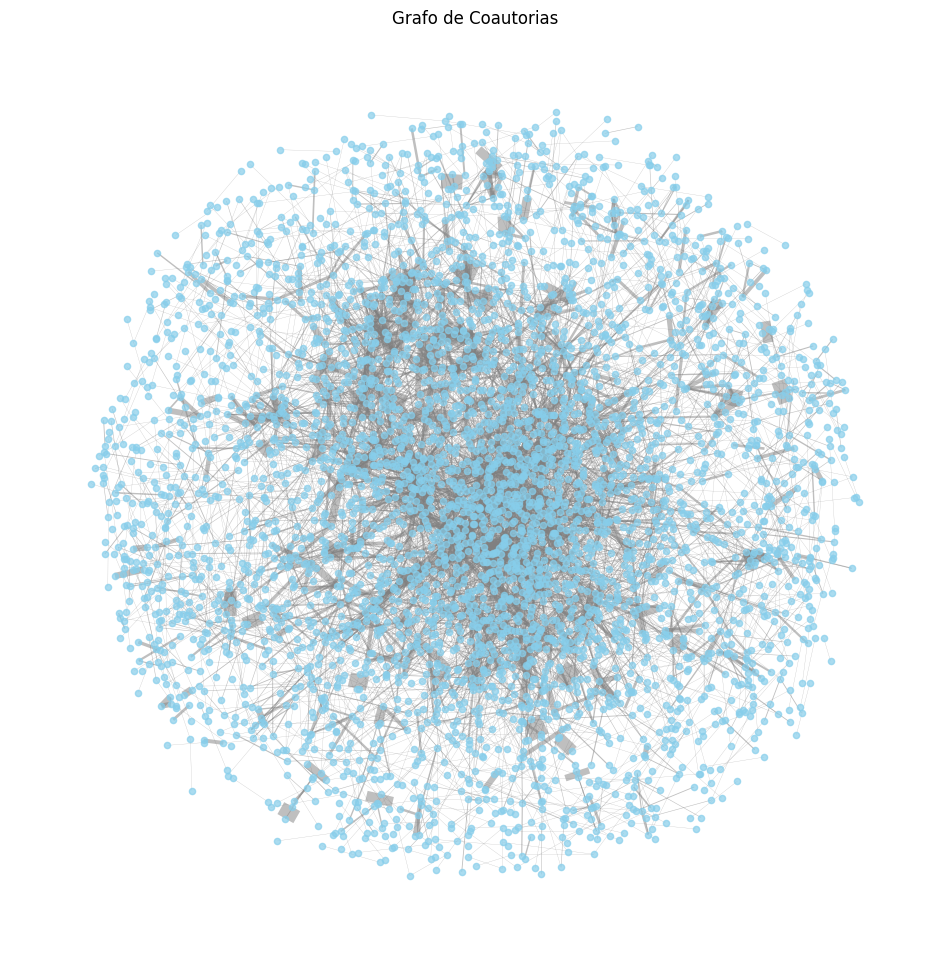

In [89]:
import matplotlib.pyplot as plt
import networkx as nx

min_weight_edge = -1


# Configurar o layout do grafo
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.1, seed=42)  # 'k' controla a distância entre os nós

# Configurar as arestas com pesos (exibir apenas arestas com peso > 1 para melhor visualização)
edges = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] > min_weight_edge]
weights = [G[u][v]['weight'] for u, v in edges]

# Desenhar nós
nx.draw_networkx_nodes(G, pos, node_size=20, node_color='skyblue', alpha=0.7)

# Desenhar arestas ponderadas
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[w * 0.2 for w in weights], edge_color='gray', alpha=0.5)

# Adicionar rótulos aos nós (apenas alguns, para evitar poluição visual)
sampled_nodes = dict(list(pos.items())[:50])  # Limita a visualização de rótulos a 50 nós
# nx.draw_networkx_labels(G, sampled_nodes, font_size=6, font_color='black', font_family='sans-serif')

# Ocultar eixos e mostrar o grafo
plt.axis('off')
plt.title("Grafo de Coautorias")
plt.show()

### COMPLETE

In [55]:
# Creating the graph
G = nx.Graph()

In [56]:
df_book.head()

,book_id,NATUREZA,IDIOMA,TIPO,NOME-DA-EDITORA,CIDADE-DA-EDITORA,PAIS-DE-PUBLICACAO,ISBN,NOME-GRANDE-AREA-DO-CONHECIMENTO2,NOME-DA-AREA-DO-CONHECIMENTO2,NOME-DA-SUB-AREA-DO-CONHECIMENTO2,NOME-DA-ESPECIALIDADE2,NOME-GRANDE-AREA-DO-CONHECIMENTO3,NOME-DA-AREA-DO-CONHECIMENTO3,NOME-DA-SUB-AREA-DO-CONHECIMENTO3,NOME-DA-ESPECIALIDADE3,STANDARDIZE-TITULO-DO-LIVRO
0,0,TEXTO_INTEGRAL,Inglês,LIVRO_PUBLICADO,Instituto Nacional de Pesquisas Espaciais,"Sao Jose dos Campos, SP",Brasil,None,None,None,None,None,None,None,None,None,formal introduction to digital image processing
1,1,NAO_INFORMADO,Inglês,LIVRO_PUBLICADO,Depositado na URLib/Web; repositorio: &lt;dpi....,"São José dos Campos, SP",Brasil,None,None,None,None,None,None,None,None,None,mathematical morphology application examples
2,2,NAO_INFORMADO,Português,LIVRO_PUBLICADO,"Depositado na URLib/Web, repositorio = &lt;dpi...",RECIFE,Brasil,None,None,None,None,None,None,None,None,None,bases da morfologia matematica para a analise ...
3,3,NAO_INFORMADO,Inglês,LIVRO_PUBLICADO,DEPOSITADO NA URLIB/WEB; REPOSITORIO: &lt;dpi....,SAO JOSE DOS CAMPOS,Brasil,None,CIENCIAS_EXATAS_E_DA_TERRA,Ciência da Computação,Metodologia e Técnicas da Computação,None,None,None,None,None,brazilian workshop'97 on mathematical morpholo...
4,4,NAO_INFORMADO,Português,LIVRO_PUBLICADO,CAMPUS,RIO DE JANEIRO,Brasil,None,None,None,None,None,None,None,None,None,bases da computacao grafica


In [57]:
# Adding book nodes
for _, row in tqdm(df_book.iterrows(), total = len(df_book)):
    G.add_node(f"Book: {row['book_id']}", type='book')
    
# Adding user nodes
for _, row in tqdm(df_user.iterrows(), total = len(df_user)):
    G.add_node(f"User: {row['LattesID']}", type='user')
    
# Adding chapter nodes
for _, row in tqdm(df_cap.iterrows(), total = len(df_cap)):
    G.add_node(f"Chapter: {row['chapter_id']}", type='chapter')
    
# Adding event nodes
for _, row in tqdm(df_eventos.iterrows(), total = len(df_eventos)):
    G.add_node(f"Event: {row['paper_id']}", type='event')
    
# Adding event nodes
for _, row in tqdm(df_per.iterrows(), total = len(df_per)):
    G.add_node(f"Jornal: {row['paper_id']}", type='jornal')

100%|██████████| 150283/150283 [00:06<00:00, 23864.39it/s]


In [58]:
# Adding edges between users and books they wrote
for _, row in tqdm(df_user_book.iterrows(), total = len(df_user_book)):
    lattes_user_id = row['LattesID']
    book_id = row['book_id']
    G.add_edge(f"User: {lattes_user_id}", f"Book: {book_id}")
    
# Adding edges between users and chapter they wrote
for _, row in tqdm(df_user_cap.iterrows(), total = len(df_user_cap)):
    lattes_user_id = row['LATTES_ID']
    chapter_id = row['chapter_id']
    G.add_edge(f"User: {lattes_user_id}", f"Chapter: {chapter_id}") 
    
# Adding edges between users and chapter they wrote
for _, row in tqdm(df_user_eventos.iterrows(), total = len(df_user_eventos)):
    lattes_user_id = row['LattesID']
    paper_id = row['paper_id']
    G.add_edge(f"User: {lattes_user_id}", f"Event: {paper_id}") 
    
# Adding edges between users and chapter they wrote
for _, row in tqdm(df_user_per.iterrows(), total = len(df_user_per)):
    lattes_user_id = row['LattesID']
    paper_id = row['paper_id']
    G.add_edge(f"User: {lattes_user_id}", f"Jornal: {paper_id}") 

100%|██████████| 169425/169425 [00:05<00:00, 31188.93it/s]


## PLOT